In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from imblearn.over_sampling import SMOTE


In [2]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0.0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,1.0
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,2.0
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2.0
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2.0


In [4]:
df.drop(columns=['index','Patient Id'],inplace=True)


In [5]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0.0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2.0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2.0
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2.0
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2.0
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2.0


In [6]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   Gender                    1000 non-null   int64  
 2   Air Pollution             1000 non-null   int64  
 3   Alcohol use               1000 non-null   int64  
 4   Dust Allergy              1000 non-null   int64  
 5   OccuPational Hazards      1000 non-null   int64  
 6   Genetic Risk              1000 non-null   int64  
 7   chronic Lung Disease      1000 non-null   int64  
 8   Balanced Diet             1000 non-null   int64  
 9   Obesity                   1000 non-null   int64  
 10  Smoking                   1000 non-null   int64  
 11  Passive Smoker            1000 non-null   int64  
 12  Chest Pain                1000 non-null   int64  
 13  Coughing of Blood         1000 non-null   int64  
 14  Fatigue  

In [8]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


<Axes: xlabel='Age'>

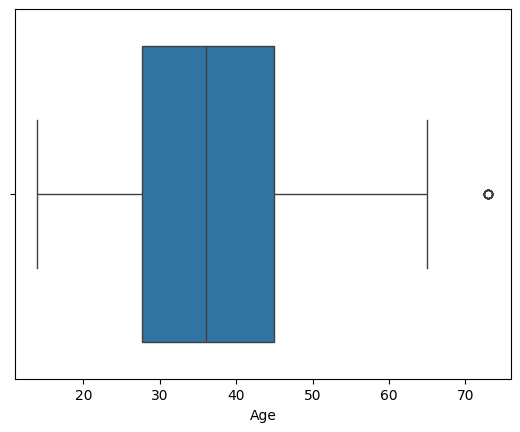

In [9]:
sns.boxplot(x='Age',data=df)

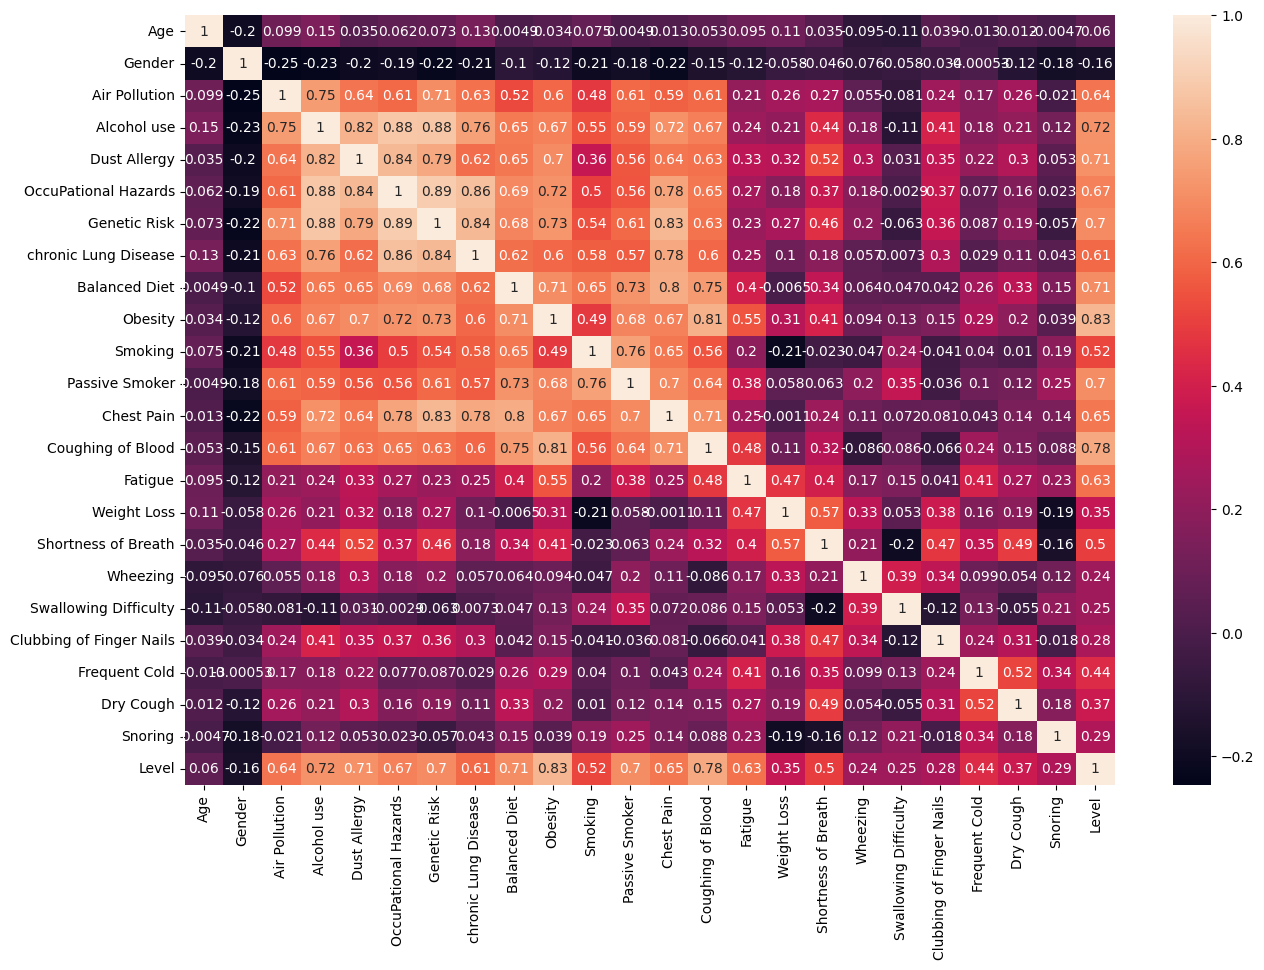

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [11]:
df['Level']=df['Level'].astype('int64')

In [12]:
X = df.iloc[:,:-1]
y = df['Level']

In [13]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X=X),columns=X.columns)

In [14]:
y.value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

In [15]:
sm = SMOTE()
X_re,y_re = sm.fit_resample(X,y)

C:\Users\rouna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [16]:
y_re.value_counts()

Level
0    365
1    365
2    365
Name: count, dtype: int64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_re,y_re,test_size=0.2,random_state=42)

In [18]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)
print('Logistic Regression')
print(f'accuracy score: {accuracy_score(y_test,lr.predict(X_test))*100:.2f} %')
print(f'precision score: {precision_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')
print(f'recall score: {recall_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')
print(f'f1 score: {f1_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')

Logistic Regression
accuracy score: 100.00 %
precision score: 100.00 %
recall score: 100.00 %
f1 score: 100.00 %


In [19]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='best')
dt.fit(X_train,y_train)
print('Decision Tree Classifier')
print(f'accuracy score: {accuracy_score(y_test,lr.predict(X_test))*100:.2f} %')
print(f'precision score: {precision_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')
print(f'recall score: {recall_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')
print(f'f1 score: {f1_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')

Decision Tree Classifier
accuracy score: 100.00 %
precision score: 100.00 %
recall score: 100.00 %
f1 score: 100.00 %


In [20]:
sv = SVC(C=1,degree=1,gamma='scale',kernel='linear')
sv.fit(X_train,y_train)
print("Support Vector Classifier")
print(f'accuracy score: {accuracy_score(y_test,lr.predict(X_test))*100:.2f} %')
print(f'precision score: {precision_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')
print(f'recall score: {recall_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')
print(f'f1 score: {f1_score(y_test,lr.predict(X_test),average='weighted')*100:.2f} %')

Support Vector Classifier
accuracy score: 100.00 %
precision score: 100.00 %
recall score: 100.00 %
f1 score: 100.00 %


In [21]:
gc = GridSearchCV( param_grid={'penalty':['l1', 'l2', 'elasticnet']},estimator=lr)
gc.fit(X_train,y_train)
gc.best_params_

C:\Users\rouna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rouna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rouna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packa

{'penalty': 'l2'}

In [22]:
gc1 = GridSearchCV( param_grid={'criterion':['gini', 'entropy', 'log_loss'] ,
    'splitter': ['best', 'random'],'max_depth':[i for i in range(2,21)] },estimator=dt)
gc1.fit(X_train,y_train)
gc1.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [23]:
gc2 = GridSearchCV( param_grid={'C': [i for i in range(1,8)],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'] ,
    'degree': [j for j in range(1,8)],
    'gamma': ['scale', 'auto']} ,estimator=sv)
gc2.fit(X_train,y_train)
gc2.best_params_

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [24]:
vc = VotingClassifier(estimators=[('lr1',lr),('dt1',dt),('sv1',sv)])
vc.fit(X_train,y_train)
vc.score(X_test,y_test)

1.0

In [25]:
confusion_matrix(y_test,vc.predict(X_test))

array([[75,  0,  0],
       [ 0, 74,  0],
       [ 0,  0, 70]], dtype=int64)

In [26]:
cv = cross_val_score(estimator=vc,X=X_re,y=y_re,cv=KFold(n_splits=10))
cv.sort()
cv*100

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [27]:
row = int(input("Enter the value of row: "))
t = X.iloc[row:row+1,:]
t

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
752,-0.181174,-0.819903,1.064362,1.31225,0.926842,1.025275,1.138323,0.876816,-1.16704,-0.218941,...,-0.766045,-0.827281,1.426018,0.770597,0.599246,-1.210093,2.127068,-0.292643,0.07213,-0.628245


In [28]:
X_in = t
stscaler = StandardScaler() #ignore:warnings
stscaler.fit(X)
X_in = stscaler.transform(X_in)

y_pred = vc.predict(X_in)

if(y_pred==0):
    print("Patient has low risk of lung cancer ")
elif(y_pred==1):
    print("Patient has moderate risk of lung cancer")
else:
    print("Patient has high risk of lung cancer")


Patient has moderate risk of lung cancer


In [29]:
print(classification_report(y_test,vc.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00        70

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



In [30]:
y_pr_train = vc.predict(X_train)
y_pr_test = vc.predict(X_test)
acc_train = accuracy_score(y_train,y_pr_train)*100
acc_test = accuracy_score(y_test,y_pr_test)*100
pre_train = precision_score(y_train,y_pr_train,average='weighted')*100
pre_test = precision_score(y_test,y_pr_test,average='weighted')*100
rec_train = recall_score(y_train,y_pr_train,average='weighted')*100
rec_test = recall_score(y_test,y_pr_test,average='weighted')*100
f1_train = f1_score(y_train,y_pr_train,average='weighted')*100
f1_test = f1_score(y_test,y_pr_test,average='weighted')*100

Text(0.5, 1.0, 'F1-Score')

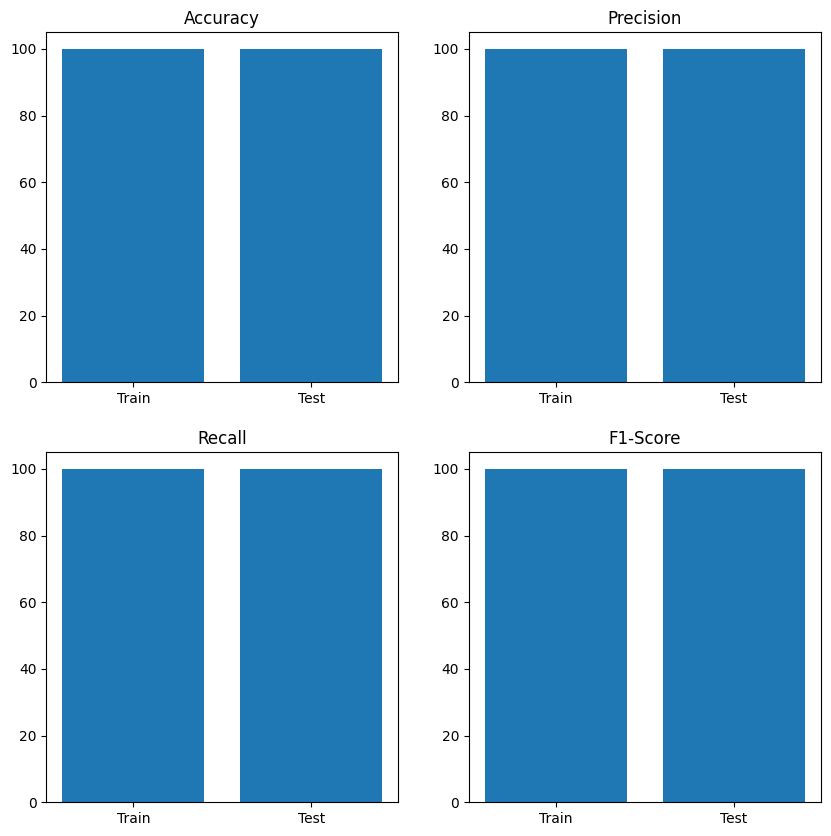

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.bar(['Train','Test'],[accuracy_score(y_train,y_pr_train)*100,accuracy_score(y_test,y_pr_test)*100])
plt.title("Accuracy")

plt.subplot(2,2,2)
plt.bar(['Train','Test'],[precision_score(y_train,y_pr_train,average='weighted')*100,precision_score(y_test,y_pr_test,average='weighted')*100])
plt.title("Precision")

plt.subplot(2,2,3)
plt.bar(['Train','Test'],[recall_score(y_train,y_pr_train,average='weighted')*100,recall_score(y_test,y_pr_test,average='weighted')*100])
plt.title("Recall")

plt.subplot(2,2,4)
plt.bar(['Train','Test'],[f1_score(y_train,y_pr_train,average='weighted')*100,f1_score(y_test,y_pr_test,average='weighted')*100])
plt.title("F1-Score")

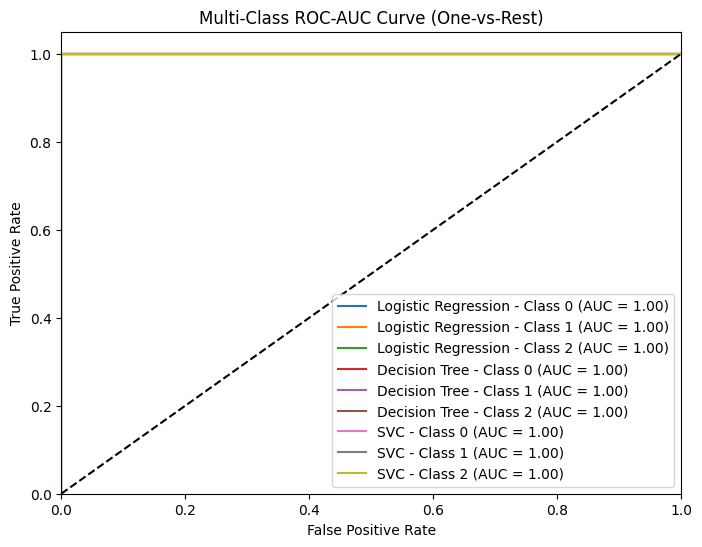

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

n_classes = len(np.unique(y_train)) 
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  


sv = SVC(C=1, degree=1, gamma='scale', kernel='linear', probability=True)
sv.fit(X_train, y_train)  

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "SVC": sv
}


plt.figure(figsize=(8, 6))


for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = model.decision_function(X_test)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])  
        roc_auc = auc(fpr, tpr)  
        plt.plot(fpr, tpr, label=f"{model_name} - Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC-AUC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()



In [38]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17863924,
       0.09857969, 0.37780264, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.24906405, 0.        , 0.        ,
       0.        , 0.        , 0.09591437])